In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('results-survey634362.csv')
#range1 = range(0,6)
df = df.drop(df.columns[[range(0,6)]], axis=1)
#print(df.columns)
df.rename(columns={df.columns[0]: 'Country', df.columns[1]: 'Business Category'\
                   , df.columns[2]: 'Business Category [Business Category - Other]'\
                   , df.columns[12]: 'Campaign Run'}, inplace=True)

types_of_network = ['Country', 'Business Category [Business Category - Other]',
                    'Campaign Run',
                    '5._Please_provide_more_information.',
                    '3._What_type_of_network_are_you_operating?_[FTTX]',
 '3._What_type_of_network_are_you_operating?_[ADSL]',
 '3._What_type_of_network_are_you_operating?_[Mobile_(2G,_3G,_LTE,_LTE-A)]',
 '3._What_type_of_network_are_you_operating?_[Wireless_network_(WIFI,_Wimax)]',
 '3._What_type_of_network_are_you_operating?_[IP_Transit_Services/Wholesale]',
 '3._What_type_of_network_are_you_operating?_[Community_network_(Mesh_network)]',
 '3._What_type_of_network_are_you_operating?_[Local_Area_Network]',
 '3._What_type_of_network_are_you_operating?_[N/A]',
 '3._What_type_of_network_are_you_operating?_[Other]']

business_category = ['3._What_type_of_network_are_you_operating?_[FTTX]',
 '3._What_type_of_network_are_you_operating?_[ADSL]',
 '3._What_type_of_network_are_you_operating?_[Mobile_(2G,_3G,_LTE,_LTE-A)]',
 '3._What_type_of_network_are_you_operating?_[Wireless_network_(WIFI,_Wimax)]',
 '3._What_type_of_network_are_you_operating?_[IP_Transit_Services/Wholesale]',
 '3._What_type_of_network_are_you_operating?_[Community_network_(Mesh_network)]',
 '3._What_type_of_network_are_you_operating?_[Local_Area_Network]',
 '3._What_type_of_network_are_you_operating?_[N/A]',
 '3._What_type_of_network_are_you_operating?_[Other]']

reasons =['Business Category [Business Category - Other]',
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Network_monitoring]',
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Quality_of_Service_(QoS)/Quality_of_Experience_(QoE)]',
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Research]',
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Censorship_Measurement]',
              "6._Please_state_your_main_purpose_for_running_network_measurements?_[I_don't_run_any_measurement]",
              '6._Please_state_your_main_purpose_for_running_network_measurements?_[Other]']
#df[df['Country'].isnull()]
df['Country'].replace(np.nan, "Other", inplace=True)

#df

/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:2095: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [58]:
df.columns.tolist()

['Country',
 'Business Category',
 'Business Category [Business Category - Other]',
 '3._What_type_of_network_are_you_operating?_[FTTX]',
 '3._What_type_of_network_are_you_operating?_[ADSL]',
 '3._What_type_of_network_are_you_operating?_[Mobile_(2G,_3G,_LTE,_LTE-A)]',
 '3._What_type_of_network_are_you_operating?_[Wireless_network_(WIFI,_Wimax)]',
 '3._What_type_of_network_are_you_operating?_[IP_Transit_Services/Wholesale]',
 '3._What_type_of_network_are_you_operating?_[Community_network_(Mesh_network)]',
 '3._What_type_of_network_are_you_operating?_[Local_Area_Network]',
 '3._What_type_of_network_are_you_operating?_[N/A]',
 '3._What_type_of_network_are_you_operating?_[Other]',
 'Campaign Run',
 '5._Please_provide_more_information.',
 '6._Please_state_your_main_purpose_for_running_network_measurements?_[Network_monitoring]',
 '6._Please_state_your_main_purpose_for_running_network_measurements?_[Quality_of_Service_(QoS)/Quality_of_Experience_(QoE)]',
 '6._Please_state_your_main_purpose_f

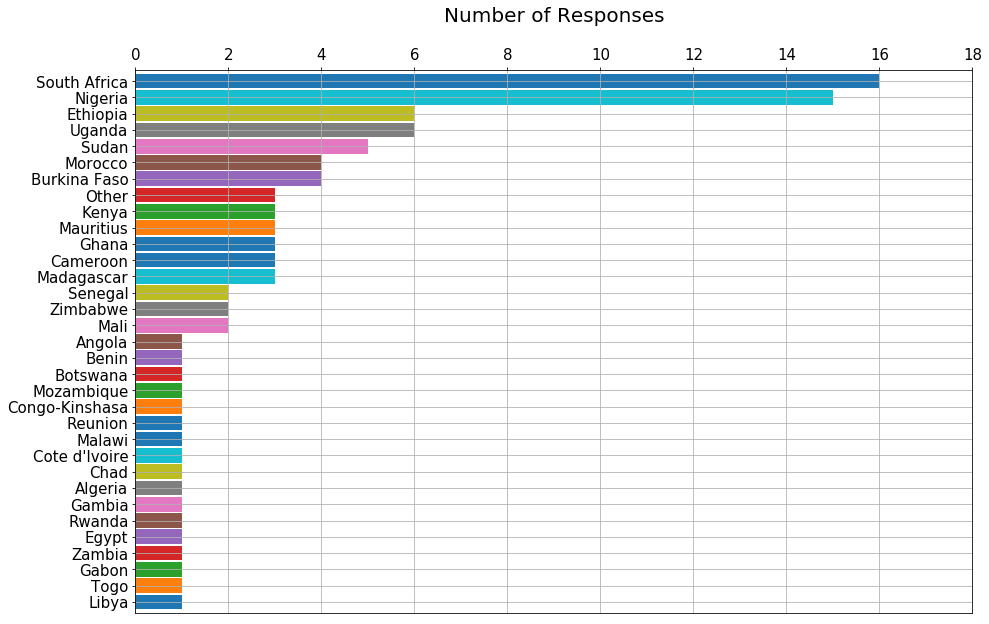

In [60]:
#Number and Percentage of responses per country
def country_responses():
    col1 = df['Country'].value_counts(dropna=False)
    #col2 = df['Country'].value_counts(dropna=False, normalize=True)*100
    #final = pd.concat([col1, col2], axis=1)
    #final.columns = ['Number of Responses', 'Percentage']
    col1 = col1.iloc[::-1] #Reversing the index to have the higher values on top of the bar chart
    ax = col1.plot(kind='barh', figsize=(15,10), width=.9, grid=True)
    #ax.set_xlim(0,18,2)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18],fontsize=15)
    plt.xlabel("Number of Responses\n", fontsize=20)
    plt.yticks(fontsize=15)
    #plt.legend(fontsize="xx-large")
    plt.show()
    return
country_responses()

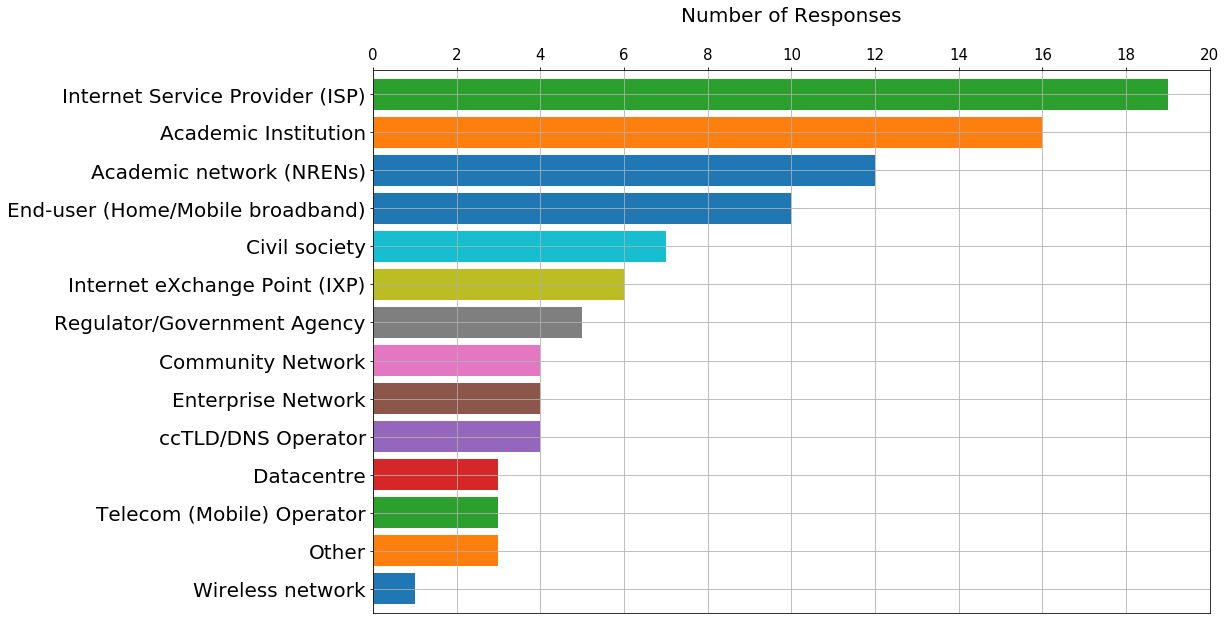

In [62]:
#Number of Responses by Business Category
def business_responses():
    col1 = df['Business Category'].value_counts(dropna=False)
    col2 = df['Business Category'].value_counts(dropna=False, normalize=True)*100
    final = pd.concat([col1, col2], axis=1)
    col1 = col1.iloc[::-1]
    final.columns = ['Number of Responses', 'Percentage']
    ax = col1.plot(kind='barh', figsize=(15,10), width=.8, grid=True)
    #ax.set_xlim(0,20)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], fontsize=15)
    plt.xlabel("Number of Responses\n", fontsize=20)
    plt.yticks(fontsize=20)
    #plt.legend(fontsize="xx-large")
    plt.show()
    return
business_responses()

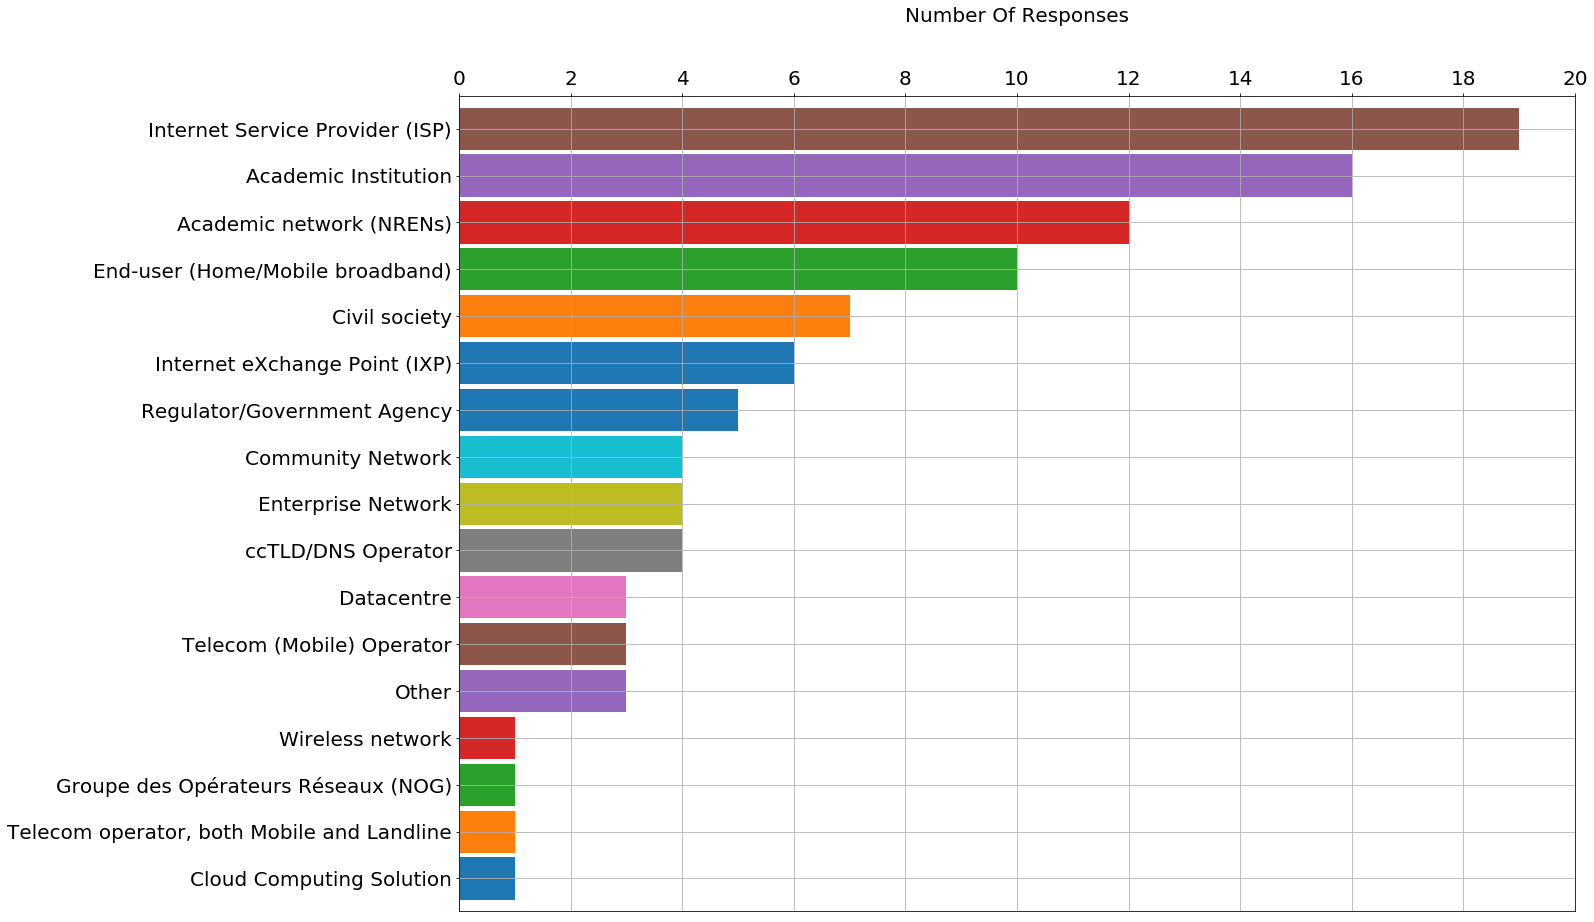

In [42]:
#Number of Responses by Business Category with [Other] answers included
def network_responses():
    col1 = df['Business Category'].value_counts()
    other = df['Business Category [Business Category - Other]'].value_counts()
    new = pd.concat([col1, other], axis=0)
    new = new.iloc[::-1] #List index from bottom-up
    ax = new.plot(kind='barh', figsize=(20,15), legend=False, width=.9, grid=True)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], fontsize=20)
    plt.xlabel("Number Of Responses\n\n", fontsize=20)
    plt.yticks(fontsize=20)
    #plt.legend(fontsize="xx-large")
    plt.show()
    return
network_responses()



Type 'Yes' or 1 for list of businesses running measurement campaign and 'No' or 0 otherwise.1


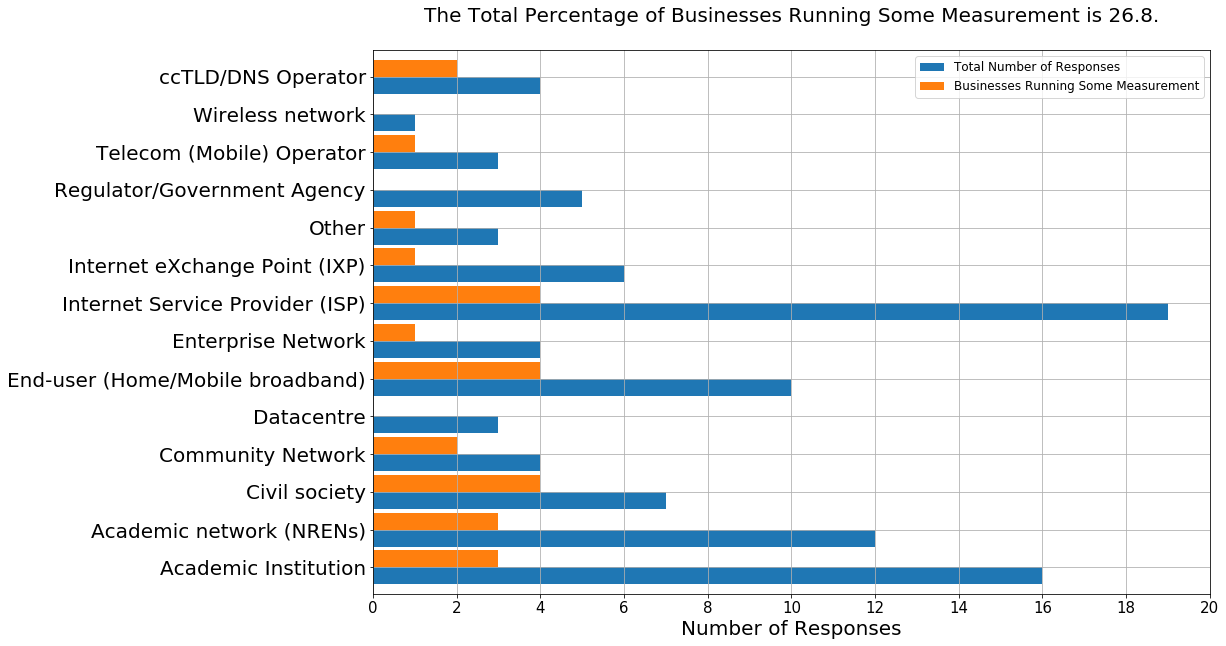

In [64]:
#Whether a business category has run measurements or not
def measurement_campaign():
    coun = df['Business Category'].value_counts(dropna=False)
    
    while True:
        value = input("\n\nType 'Yes' or 1 for list of businesses running measurement campaign and 'No' or 0 otherwise.")
        if value in ("yes", "Yes", "1"):
            #print("\n")
            final = df[['Business Category', 'Campaign Run']][df['Campaign Run']=="Yes"]
            final2 = final.groupby('Business Category').agg({'Campaign Run': 'count'})
            text = "Running Some Measurement"
            break
        if value in ("No", "no", "0"):
            #print("\n")
            final = df[['Business Category', 'Campaign Run']][df['Campaign Run']=="No (Go to Question 6)"]
            final2 = (final.groupby('Business Category').agg({'Campaign Run': 'count'})).sort_values('Campaign Run',\
                                                                                                 ascending=False)
            text = "Not Running Any Measurement"
            break
        print("Invalid response.")

    new = pd.concat([coun, final2], axis=1, sort=True)
    new.columns = ['Total Number of Responses', 'Businesses ' + text]
    percentage = round((new.T.iloc[1].sum()/new['Total Number of Responses'].sum())*100, 2)
    ax = new.plot(kind='barh', figsize=(15,10), legend=True, width=.9, grid=True)

    ax.set_title("The Total Percentage of Businesses " + text + " is " + str(percentage) + ".\n", fontsize = 20)
    plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], fontsize=15)
    plt.xlabel("Number of Responses", fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    return 
   
measurement_campaign()

In [65]:
#Further Information from businesses that run campaign(s)
def campaign_info():
    df2 = df.set_index('Business Category')
    df3 = df2[types_of_network]
    campaign = df3.loc[df3['Campaign Run']== "Yes"]
    while True:
        input1 = input("To read further info supplied by respondents about their measurement campaign,\
 choose a value between 0 and {} and hit Enter or leave blank to have all the {} responses\
 displayed.\n\n".format((len(campaign)-1), len(campaign)))
        if (input1.isdigit()):
            value = int(input1)
            if value in range(0, (len(campaign)-1)):
                text = tuple(list(df2[['5._Please_provide_more_information.']].dropna().values[value]))[0]
                print(text)
                return df3.loc[df3['5._Please_provide_more_information.'] == text]
                break
            else:
                print("Enter values between 0 and {}. \n\n".format((len(campaign)-1)))
        elif input1 == "":
            return campaign
campaign_info()

To read further info supplied by respondents about their measurement campaign, choose a value between 0 and 25 and hit Enter or leave blank to have all the 26 responses displayed.




,Country,Business Category [Business Category - Other],Campaign Run,5._Please_provide_more_information.,3._What_type_of_network_are_you_operating?_[FTTX],3._What_type_of_network_are_you_operating?_[ADSL],"3._What_type_of_network_are_you_operating?_[Mobile_(2G,_3G,_LTE,_LTE-A)]","3._What_type_of_network_are_you_operating?_[Wireless_network_(WIFI,_Wimax)]",3._What_type_of_network_are_you_operating?_[IP_Transit_Services/Wholesale],3._What_type_of_network_are_you_operating?_[Community_network_(Mesh_network)],3._What_type_of_network_are_you_operating?_[Local_Area_Network],3._What_type_of_network_are_you_operating?_[N/A],3._What_type_of_network_are_you_operating?_[Other]
Business Category,,,,,,,,,,,,,
Academic Institution,Sudan,NaN,Yes,Our own network monitory\nAltlas\nKida,No,No,No,Yes,No,Yes,Yes,No,NaN
Internet eXchange Point (IXP),Madagascar,NaN,Yes,La mésure de trafic réseau internet est un élé...,No,No,No,Yes,Yes,No,Yes,No,NaN
Enterprise Network,South Africa,NaN,Yes,Ran own RIPE probe on home network,Yes,No,No,No,Yes,No,Yes,No,WAN
Internet Service Provider (ISP),Nigeria,NaN,Yes,Regular user satisfaction measurement campaign,No,No,No,No,Yes,No,No,No,NaN
Telecom (Mobile) Operator,Burkina Faso,NaN,Yes,I'm hosting RIPE ATLAS and Anchor at Orange Bu...,No,No,Yes,Yes,Yes,No,Yes,No,NaN
Civil society,Gambia,NaN,Yes,For monitoring interference and also our projects,No,No,Yes,Yes,No,Yes,Yes,No,NaN
Internet Service Provider (ISP),Angola,NaN,Yes,atlas probes,No,No,No,No,Yes,No,No,No,NaN
Academic network (NRENs),Reunion,NaN,Yes,L'accès à Internet des îles de la Zone Océan I...,Yes,Yes,No,No,No,No,No,No,NaN
Academic Institution,Nigeria,NaN,Yes,"In a research. ""Influence of personality trait...",No,No,No,No,No,No,Yes,No,NaN


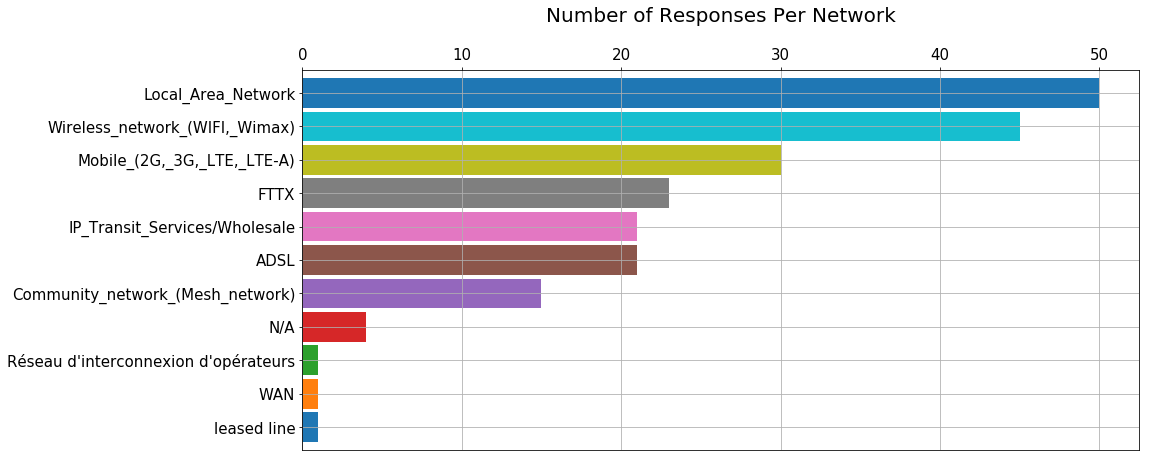

In [66]:
#Number of Networks Operated
def country():
    #col1 = df['Business Category'].value_counts(dropna=False)
    df1 = df[types_of_network]
    freq = []
    network = []
    number = 4
    for col in df1.columns[number:]:
        if col == "3._What_type_of_network_are_you_operating?_[Other]":
            new_network = tuple(df1[col].dropna().unique())
            for net in new_network:
                freq.append(1)
                network.append(net)
        else:
            value = len(df1[df1[col]=="Yes"])
            freq.append(value)
            ntype = col.split('[')[1].split(']')[0]
            network.append(ntype)
    values = zip(network, freq)
    final = list(set(values))
    #print(values
    new_df = pd.DataFrame(final, columns=['Network', 'Number of Responses']).sort_values(by=['Number of Responses'])
    #new_df = new_df.sort_values('Number of Responses', inplace=True)
    ax = new_df.plot(x='Network', y='Number of Responses', kind='barh', figsize=(15,7), legend=False, width=.89, grid=True)
    #ax.set_xlim(0,18,2)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    plt.xticks(fontsize=15)
    plt.xlabel("Number of Responses Per Network\n", fontsize=20)
    plt.yticks(fontsize=15)
    plt.ylabel("")
    #plt.legend(fontsize="xx-large")
    plt.show()
    return 
 
country()

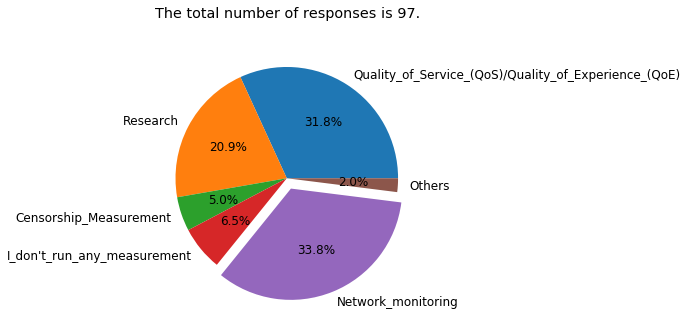

In [68]:
#General reasons for running measurement
def reasons_for_measurement():
    df2 = df[reasons]
    freq = []
    purpose = []
    for col in df2.columns:
        if col == "6._Please_state_your_main_purpose_for_running_network_measurements?_[Other]":
            new_purpose = tuple(df2[col].dropna().unique())
            for purp in new_purpose:
                freq.append(1)
                purpose.append(purp)
        else:
            value = len(df2[df2[col]=="Yes"])
            freq.append(value)
            ntype = col.split('[')[1].split(']')[0]
            purpose.append(ntype)
    values = zip(purpose, freq)
    final = dict(set(values))
   
    #plot piechart by combining all entries with less than one percent of the total as others
    dsum = sum(final.values())
    dthresh = dsum * 0.01
    includedict = {}
    excludedict = {}
    
    for k, v in final.items():
        if v >= dthresh:
            includedict.update({k:v})
        else:
            excludedict.update({k:v})
            others = sum(excludedict.values())
    
    total_resp = len(df2.index)
    includedict.update({'Others':others})
    y = includedict.values()
    label = includedict.keys()
    plt.pie([float(v) for v in y], labels=[k for k in label],
            autopct='%1.1f%%', explode = (0, 0, 0, 0, 0.1, 0))
    plt.axis('equal')
    plt.rcParams['font.size'] = 12
    plt.tight_layout()
    plt.title("The total number of responses is {}.\n\n".format(total_resp))
    plt.show()
    
    return
reasons_for_measurement()

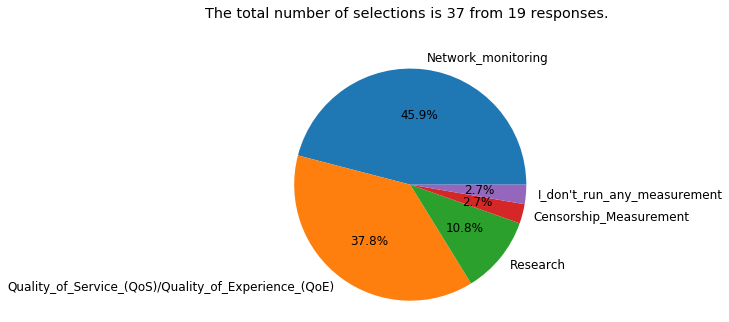

In [69]:
def specific_reasons():
    
    df1 = df[df['Business Category'] == "Internet Service Provider (ISP)"].set_index('Business Category')
    df2 = df1[reasons]
    key_name=[]
    total = {}
    #count = 0
    blacklisted = "No"
    total_responses = len(df2.index)
    for col in df2.columns:
        #count += 1
        yes = (df2[col].value_counts().to_dict())
        key_name.append(tuple(yes.items()))
        
        if len(yes) != 0:
            #print(yes)
            key = [key for key, value in yes.items() if key not in blacklisted]
            if len(key) != 0:
                value = yes[key[0]]           
            ntype = col.split('[')[1].split(']')[0]
            if ntype == "Other":
                total.update({key[0]:value})
            else:
                total.update({ntype:value})
    summation = sum(total.values())           
    y = total.values()
    label = total.keys()
    plt.pie([float(v) for v in y], labels=[k for k in label],
            autopct='%1.1f%%')
    plt.axis('equal')
    plt.rcParams['font.size'] = 12
    plt.tight_layout()
    plt.title("The total number of selections is " + str(summation) + " from " + str(total_responses) +\
              " responses. \n\n")    
    plt.show()
    return 
specific_reasons()


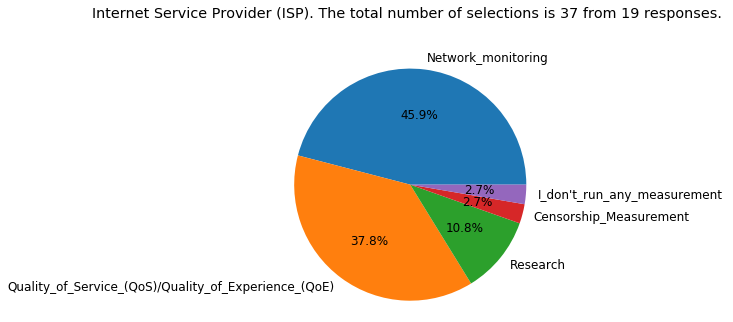

In [70]:
def specific_reasons():
    
    df1 = df[df['Business Category'] == "Internet Service Provider (ISP)"].set_index('Business Category')
    df2 = df1[reasons]
    key_name=[]
    total = {}
    #count = 0
    blacklisted = "No"
    total_responses = len(df2.index)
    for col in df2.columns:
        #count += 1
        yes = (df2[col].value_counts().to_dict())
        key_name.append(tuple(yes.items()))
        
        if len(yes) != 0:
            #print(yes)
            key = [key for key, value in yes.items() if key not in blacklisted]
            if len(key) != 0:
                value = yes[key[0]]           
            ntype = col.split('[')[1].split(']')[0]
            if ntype == "Other":
                total.update({key[0]:value})
            else:
                total.update({ntype:value})
    summation = sum(total.values())           
    y = total.values()
    label = total.keys()
    plt.pie([float(v) for v in y], labels=[k for k in label],
            autopct='%1.1f%%')
    plt.axis('equal')
    plt.rcParams['font.size'] = 12
    plt.tight_layout()
    plt.title("Internet Service Provider (ISP). The total number of selections is " + str(summation) \
              + " from " + str(total_responses) + " responses. \n\n")
    plt.show()
    return 
specific_reasons()

In [ ]:
df['Business Category'].unique()

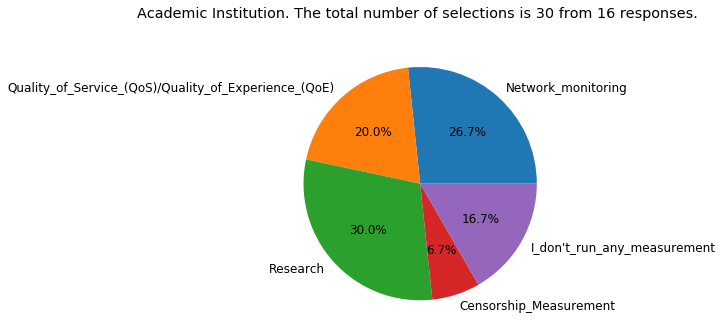

In [71]:
def specific_reasons():
    
    df1 = df[df['Business Category'] == "Academic Institution"].set_index('Business Category')
    df2 = df1[reasons]
    key_name=[]
    total = {}
    #count = 0
    blacklisted = "No"
    total_responses = len(df2.index)
    for col in df2.columns:
        #count += 1
        yes = (df2[col].value_counts().to_dict())
        key_name.append(tuple(yes.items()))
        
        if len(yes) != 0:
            #print(yes)
            key = [key for key, value in yes.items() if key not in blacklisted]
            if len(key) != 0:
                value = yes[key[0]]           
            ntype = col.split('[')[1].split(']')[0]
            if ntype == "Other":
                total.update({key[0]:value})
            else:
                total.update({ntype:value})
    summation = sum(total.values())           
    y = total.values()
    label = total.keys()
    plt.pie([float(v) for v in y], labels=[k for k in label],
            autopct='%1.1f%%')
    plt.axis('equal')
    plt.rcParams['font.size'] = 12
    plt.tight_layout()
    plt.title("Academic Institution. The total number of selections is " + str(summation) \
              + " from " + str(total_responses) + " responses. \n\n")
    plt.show()
    return 
specific_reasons()

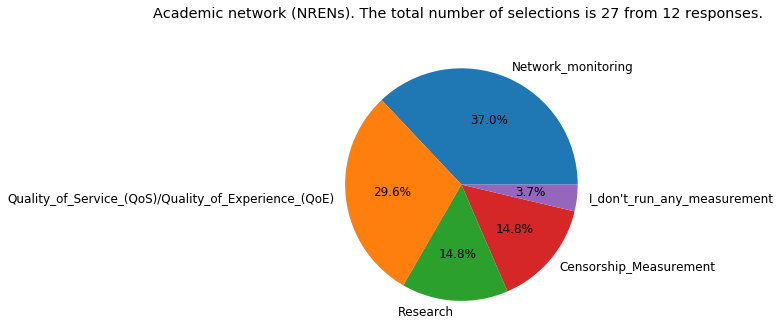

In [72]:
def specific_reasons():
    
    df1 = df[df['Business Category'] == "Academic network (NRENs)"].set_index('Business Category')
    df2 = df1[reasons]
    key_name=[]
    total = {}
    #count = 0
    blacklisted = "No"
    total_responses = len(df2.index)
    for col in df2.columns:
        #count += 1
        yes = (df2[col].value_counts().to_dict())
        key_name.append(tuple(yes.items()))
        
        if len(yes) != 0:
            #print(yes)
            key = [key for key, value in yes.items() if key not in blacklisted]
            if len(key) != 0:
                value = yes[key[0]]           
            ntype = col.split('[')[1].split(']')[0]
            if ntype == "Other":
                total.update({key[0]:value})
            else:
                total.update({ntype:value})
    summation = sum(total.values())           
    y = total.values()
    label = total.keys()
    plt.pie([float(v) for v in y], labels=[k for k in label],
            autopct='%1.1f%%')
    plt.axis('equal')
    plt.rcParams['font.size'] = 12
    plt.tight_layout()
    plt.title("Academic network (NRENs). The total number of selections is " + str(summation) \
              + " from " + str(total_responses) + " responses. \n\n")
    plt.show()
    return 
specific_reasons()

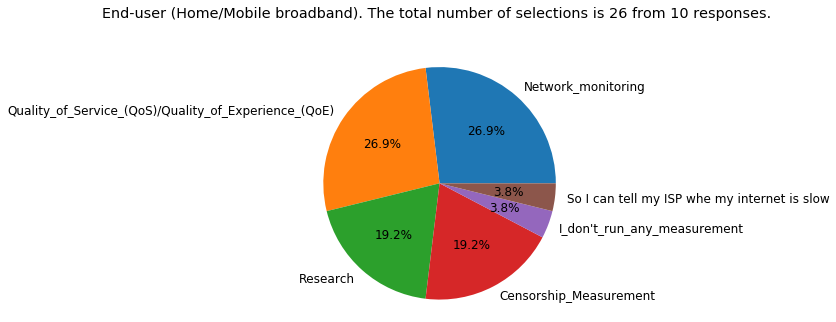

In [73]:
def specific_reasons():
    
    df1 = df[df['Business Category'] == "End-user (Home/Mobile broadband)"].set_index('Business Category')
    df2 = df1[reasons]
    key_name=[]
    total = {}
    #count = 0
    blacklisted = "No"
    total_responses = len(df2.index)
    for col in df2.columns:
        #count += 1
        yes = (df2[col].value_counts().to_dict())
        key_name.append(tuple(yes.items()))
        
        if len(yes) != 0:
            #print(yes)
            key = [key for key, value in yes.items() if key not in blacklisted]
            if len(key) != 0:
                value = yes[key[0]]           
            ntype = col.split('[')[1].split(']')[0]
            if ntype == "Other":
                total.update({key[0]:value})
            else:
                total.update({ntype:value})
    summation = sum(total.values())           
    y = total.values()
    label = total.keys()
    plt.pie([float(v) for v in y], labels=[k for k in label],
            autopct='%1.1f%%')
    plt.axis('equal')
    plt.rcParams['font.size'] = 12
    plt.tight_layout()
    plt.title("End-user (Home/Mobile broadband). The total number of selections is " + str(summation) \
              + " from " + str(total_responses) + " responses. \n\n")
    plt.show()
    return 
specific_reasons()

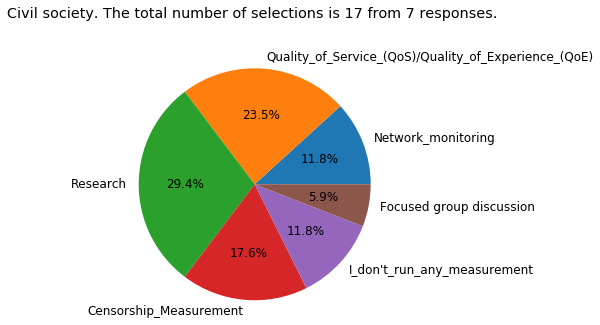

In [74]:
def specific_reasons():
    
    df1 = df[df['Business Category'] == "Civil society"].set_index('Business Category')
    df2 = df1[reasons]
    key_name=[]
    total = {}
    #count = 0
    blacklisted = "No"
    total_responses = len(df2.index)
    for col in df2.columns:
        #count += 1
        yes = (df2[col].value_counts().to_dict())
        key_name.append(tuple(yes.items()))
        
        if len(yes) != 0:
            #print(yes)
            key = [key for key, value in yes.items() if key not in blacklisted]
            if len(key) != 0:
                value = yes[key[0]]           
            ntype = col.split('[')[1].split(']')[0]
            if ntype == "Other":
                total.update({key[0]:value})
            else:
                total.update({ntype:value})
    summation = sum(total.values())           
    y = total.values()
    label = total.keys()
    plt.pie([float(v) for v in y], labels=[k for k in label],
            autopct='%1.1f%%')
    plt.axis('equal')
    plt.rcParams['font.size'] = 12
    plt.tight_layout()
    plt.title("Civil society. The total number of selections is " + str(summation) \
              + " from " + str(total_responses) + " responses. \n\n")
    plt.show()
    return
specific_reasons()

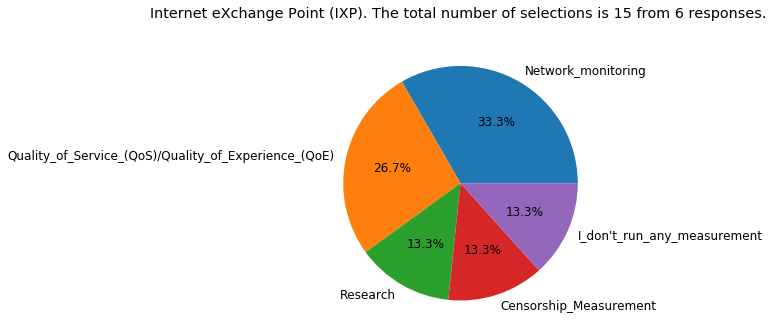

In [75]:
def specific_reasons():
    
    df1 = df[df['Business Category'] == "Internet eXchange Point (IXP)"].set_index('Business Category')
    df2 = df1[reasons]
    key_name=[]
    total = {}
    #count = 0
    blacklisted = "No"
    total_responses = len(df2.index)
    for col in df2.columns:
        #count += 1
        yes = (df2[col].value_counts().to_dict())
        key_name.append(tuple(yes.items()))
        
        if len(yes) != 0:
            #print(yes)
            key = [key for key, value in yes.items() if key not in blacklisted]
            if len(key) != 0:
                value = yes[key[0]]           
            ntype = col.split('[')[1].split(']')[0]
            if ntype == "Other":
                total.update({key[0]:value})
            else:
                total.update({ntype:value})
    summation = sum(total.values())           
    y = total.values()
    label = total.keys()
    plt.pie([float(v) for v in y], labels=[k for k in label],
            autopct='%1.1f%%')
    plt.axis('equal')
    plt.rcParams['font.size'] = 12
    plt.tight_layout()
    plt.title("Internet eXchange Point (IXP). The total number of selections is " + str(summation) \
              + " from " + str(total_responses) + " responses. \n\n")
    plt.show()
    return
specific_reasons()

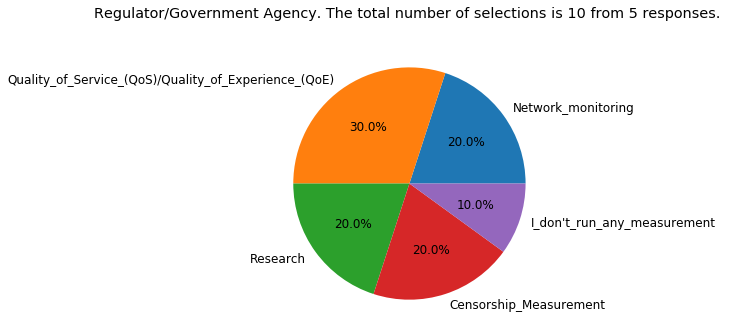

In [76]:
def specific_reasons():
    
    df1 = df[df['Business Category'] == "Regulator/Government Agency"].set_index('Business Category')
    df2 = df1[reasons]
    key_name=[]
    total = {}
    #count = 0
    blacklisted = "No"
    total_responses = len(df2.index)
    for col in df2.columns:
        #count += 1
        yes = (df2[col].value_counts().to_dict())
        key_name.append(tuple(yes.items()))
        
        if len(yes) != 0:
            #print(yes)
            key = [key for key, value in yes.items() if key not in blacklisted]
            if len(key) != 0:
                value = yes[key[0]]           
            ntype = col.split('[')[1].split(']')[0]
            if ntype == "Other":
                total.update({key[0]:value})
            else:
                total.update({ntype:value})
    summation = sum(total.values())           
    y = total.values()
    label = total.keys()
    plt.pie([float(v) for v in y], labels=[k for k in label],
            autopct='%1.1f%%')
    plt.axis('equal')
    plt.rcParams['font.size'] = 12
    plt.tight_layout()
    plt.title("Regulator/Government Agency. The total number of selections is " + str(summation) \
              + " from " + str(total_responses) + " responses. \n\n")
    plt.show()
    return
specific_reasons()

In [77]:
Civil society', 'Academic network (NRENs)', 'ccTLD/DNS Operator',
       'Community Network', 'Other', 'Wireless network'], dtype=object)

SyntaxError: invalid syntax (<ipython-input-77-bf3dba0791fc>, line 1)

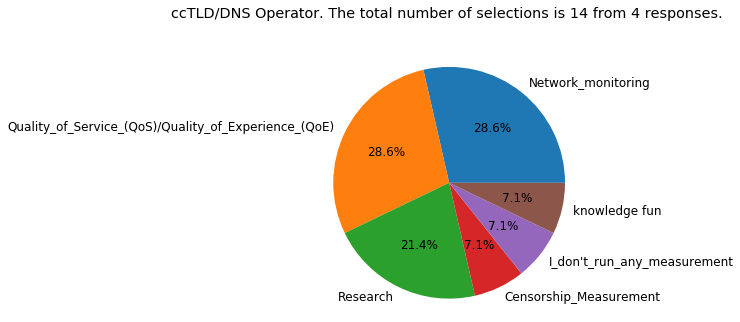

In [78]:
def specific_reasons():
    
    df1 = df[df['Business Category'] == "ccTLD/DNS Operator"].set_index('Business Category')
    df2 = df1[reasons]
    key_name=[]
    total = {}
    #count = 0
    blacklisted = "No"
    total_responses = len(df2.index)
    for col in df2.columns:
        #count += 1
        yes = (df2[col].value_counts().to_dict())
        key_name.append(tuple(yes.items()))
        
        if len(yes) != 0:
            #print(yes)
            key = [key for key, value in yes.items() if key not in blacklisted]
            if len(key) != 0:
                value = yes[key[0]]           
            ntype = col.split('[')[1].split(']')[0]
            if ntype == "Other":
                total.update({key[0]:value})
            else:
                total.update({ntype:value})
    summation = sum(total.values())           
    y = total.values()
    label = total.keys()
    plt.pie([float(v) for v in y], labels=[k for k in label],
            autopct='%1.1f%%')
    plt.axis('equal')
    plt.rcParams['font.size'] = 12
    plt.tight_layout()
    plt.title("ccTLD/DNS Operator. The total number of selections is " + str(summation) \
              + " from " + str(total_responses) + " responses. \n\n")
    plt.show()
    return
specific_reasons()

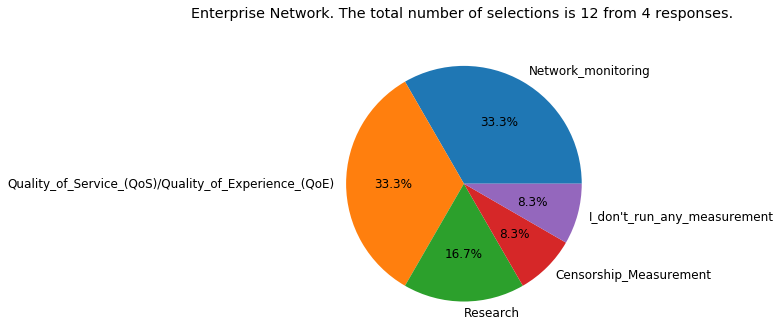

In [79]:
def specific_reasons():
    
    df1 = df[df['Business Category'] == "Enterprise Network"].set_index('Business Category')
    df2 = df1[reasons]
    key_name=[]
    total = {}
    #count = 0
    blacklisted = "No"
    total_responses = len(df2.index)
    for col in df2.columns:
        #count += 1
        yes = (df2[col].value_counts().to_dict())
        key_name.append(tuple(yes.items()))
        
        if len(yes) != 0:
            #print(yes)
            key = [key for key, value in yes.items() if key not in blacklisted]
            if len(key) != 0:
                value = yes[key[0]]           
            ntype = col.split('[')[1].split(']')[0]
            if ntype == "Other":
                total.update({key[0]:value})
            else:
                total.update({ntype:value})
    summation = sum(total.values())           
    y = total.values()
    label = total.keys()
    plt.pie([float(v) for v in y], labels=[k for k in label],
            autopct='%1.1f%%')
    plt.axis('equal')
    plt.rcParams['font.size'] = 12
    plt.tight_layout()
    plt.title("Enterprise Network. The total number of selections is " + str(summation) \
              + " from " + str(total_responses) + " responses. \n\n")
    plt.show()
    return
specific_reasons()

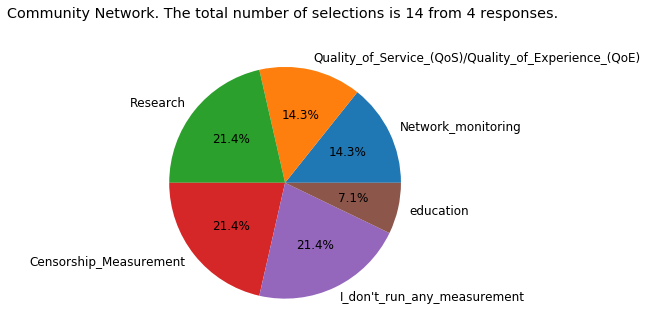

In [80]:
def specific_reasons():
    
    df1 = df[df['Business Category'] == "Community Network"].set_index('Business Category')
    df2 = df1[reasons]
    key_name=[]
    total = {}
    #count = 0
    blacklisted = "No"
    total_responses = len(df2.index)
    for col in df2.columns:
        #count += 1
        yes = (df2[col].value_counts().to_dict())
        key_name.append(tuple(yes.items()))
        
        if len(yes) != 0:
            #print(yes)
            key = [key for key, value in yes.items() if key not in blacklisted]
            if len(key) != 0:
                value = yes[key[0]]           
            ntype = col.split('[')[1].split(']')[0]
            if ntype == "Other":
                total.update({key[0]:value})
            else:
                total.update({ntype:value})
    summation = sum(total.values())           
    y = total.values()
    label = total.keys()
    plt.pie([float(v) for v in y], labels=[k for k in label],
            autopct='%1.1f%%')
    plt.axis('equal')
    plt.rcParams['font.size'] = 12
    plt.tight_layout()
    plt.title("Community Network. The total number of selections is " + str(summation) \
              + " from " + str(total_responses) + " responses. \n\n")
    plt.show()
    return
specific_reasons()

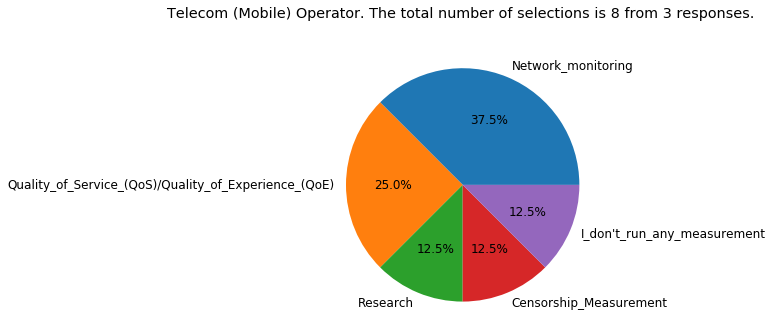

In [81]:
def specific_reasons():
    
    df1 = df[df['Business Category'] == "Telecom (Mobile) Operator"].set_index('Business Category')
    df2 = df1[reasons]
    key_name=[]
    total = {}
    #count = 0
    blacklisted = "No"
    total_responses = len(df2.index)
    for col in df2.columns:
        #count += 1
        yes = (df2[col].value_counts().to_dict())
        key_name.append(tuple(yes.items()))
        
        if len(yes) != 0:
            #print(yes)
            key = [key for key, value in yes.items() if key not in blacklisted]
            if len(key) != 0:
                value = yes[key[0]]           
            ntype = col.split('[')[1].split(']')[0]
            if ntype == "Other":
                total.update({key[0]:value})
            else:
                total.update({ntype:value})
    summation = sum(total.values())           
    y = total.values()
    label = total.keys()
    plt.pie([float(v) for v in y], labels=[k for k in label],
            autopct='%1.1f%%')
    plt.axis('equal')
    plt.rcParams['font.size'] = 12
    plt.tight_layout()
    plt.title("Telecom (Mobile) Operator. The total number of selections is " + str(summation) \
              + " from " + str(total_responses) + " responses. \n\n")
    plt.show()
    return
specific_reasons()

[Other]. The total number of selections is 7 from 3 responses: [Cloud Computing Solution], [Groupe des Opérateurs Réseaux (NOG)], and [Telecom operator, both Mobile and Landline]. 




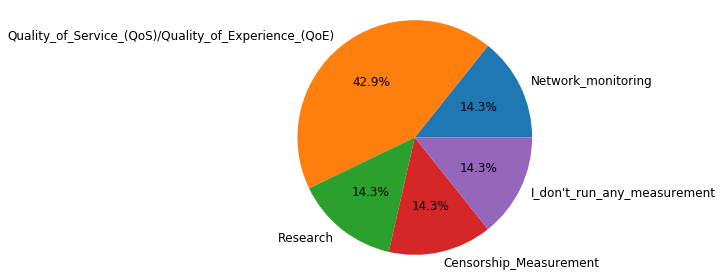

In [82]:
def specific_reasons():
    
    df1 = df[df['Business Category'] == "Other"].set_index('Business Category')
    df2 = df1[reasons]
    key_name=[]
    total = {}
    #count = 0
    blacklisted = "No"
    total_responses = len(df2.index)
    for col in df2.columns[1:]:
        #count += 1
        yes = (df2[col].value_counts().to_dict())
        key_name.append(tuple(yes.items()))
        
        if len(yes) != 0:
            #print(yes)
            key = [key for key, value in yes.items() if key not in blacklisted]
            if len(key) != 0:
                value = yes[key[0]]           
            ntype = col.split('[')[1].split(']')[0]
            if ntype == "Other":
                total.update({key[0]:value})
            else:
                total.update({ntype:value})
    summation = sum(total.values())
    
    others = df2['Business Category [Business Category - Other]'].unique()
    y = total.values()
    label = total.keys()
    plt.pie([float(v) for v in y], labels=[k for k in label],
            autopct='%1.1f%%')
    plt.axis('equal')
    plt.rcParams['font.size'] = 12
    plt.tight_layout()
    print("[Other]. The total number of selections is {} from {} responses: [{}], [{}], and [{}]. \n\n"\
              .format(str(summation), str(total_responses), others[0], others[1], others[2]))
    plt.show()
    return
specific_reasons()

More Questions to Answer

1. For business running different types of networks, does the purpose of running measurement or the chosen metric change for the different networks?
2. Overall, what is the most important metric?
3. Which metric is preferred by the different businesses and whether the same business' preferred metric(s) changes depending on the network it is running - FTTX, Wireless Network, etc?
4. Try to establish if there is a correlation between the location of a business and its reason for running measurement and/or the kind of metric they collect.
5. We also try to establish why we have 58% of respondents saying that they collect measurement data while initially in the survey only 26.8% confirmed that they are running some measurement.
6. We also try to establish the most popular measurement tools and which tools are preferred by the different businesses and network categories.
7. Try to establish whether the targetted metrics, length of measurement campaign, or the need for data analysis influence the choice of measurement tool for the businesses.
8. Find out the most popular data analysis tool in the region and the observed preferences of the different networks.
9. Whether network hosting a measurement probe/anchor have reported to be carrying out measurement or not? Basically, whether the presence of measurement probes actually encourages an entity to carryout experiments?
10. What are the most popular measurement platforms hosted? 
11. Whether certain networks or businesses of a certain location prefer a particular platform or not?
12. In the same vein, which of these networks keep the probes longer in service?
13. What is the satisfaction level regarding the existing network infrastructure in Africa? Which set of networks show the more and less satisfaction?
14. What is the reason why some networks prefer not to host or use any of the available measurement platforms- whether something is missing in these platforms?
15. What is the major hindrance to measurement in Africa and whether the stumbling block differ between the different networks?
16. How popular are the mobile measurement apps and which network uses them? In which countries are they prevalent?
... etc